In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Cycling data

In [20]:
df_cycling = pd.read_sql_table('cycling', 'sqlite:///data/my_data.sqlite', index_col=["Datetime"], parse_dates=["Datetime"])

In [21]:
df_cycling.head()

,100035541 (Neutor),101035541 (Neutor stadteinwärts),102035541 (Neutor stadtauswärts),100035541-status,101035541-status,102035541-status
Datetime,,,,,,
2020-05-01 00:00:00,18,10,8,0,0,0
2020-05-01 00:15:00,16,6,10,0,0,0
2020-05-01 00:30:00,31,11,20,0,0,0
2020-05-01 00:45:00,21,16,5,0,0,0
2020-05-01 01:00:00,17,5,12,0,0,0


In [4]:
df_cycling.index

DatetimeIndex(['2020-04-01 00:00:00', '2020-04-01 00:15:00',
               '2020-04-01 00:30:00', '2020-04-01 00:45:00',
               '2020-04-01 01:00:00', '2020-04-01 01:15:00',
               '2020-04-01 01:30:00', '2020-04-01 01:45:00',
               '2020-04-01 02:00:00', '2020-04-01 02:15:00',
               ...
               '2020-04-30 21:30:00', '2020-04-30 21:45:00',
               '2020-04-30 22:00:00', '2020-04-30 22:15:00',
               '2020-04-30 22:30:00', '2020-04-30 22:45:00',
               '2020-04-30 23:00:00', '2020-04-30 23:15:00',
               '2020-04-30 23:30:00', '2020-04-30 23:45:00'],
              dtype='datetime64[ns]', name='Datetime', length=2880, freq=None)

In [ ]:
df_cycling.index.max() - df_cycling.index.min()

In [ ]:
df_cycling.groupby(df_cycling["Datetime"].dt.day)["100035541 (Neutor)"].sum()

In [22]:
may_bikes = df_cycling.resample("1D").sum()["100035541 (Neutor)"]

In [23]:
t = may_bikes.index

In [ ]:
df_cycling.groupby(df_cycling["Datetime"].dt.hour)["100035541 (Neutor)"].sum().plot(kind='bar', rot=0, ax=axs)

## Rain data

In [18]:
df_rain = pd.read_sql_table('rain', 'sqlite:///data/my_data.sqlite', index_col=["MESS_DATUM"], parse_dates=["MESS_DATUM"])

In [19]:
df_rain.head()

,STATIONS_ID,QN,RWS_DAU_10,RWS_10,RWS_IND_10,eor
MESS_DATUM,,,,,,
2020-01-01 00:00:00,1766,3,0,0.0,0,eor
2020-01-01 00:10:00,1766,3,0,0.0,0,eor
2020-01-01 00:20:00,1766,3,0,0.0,0,eor
2020-01-01 00:30:00,1766,3,0,0.0,0,eor
2020-01-01 00:40:00,1766,3,0,0.0,0,eor


In [14]:
df_rain["RWS_10"].min()

-999.0

In [15]:
df_rain["2020-04-01":"2020-04-30"]["RWS_10"].min()

0.0

In [ ]:
df_rain.resample("1D").sum()["2020-04-01":"2020-04-30"]

In [24]:
may_rain_duration = df_rain.resample("1D").sum()["2020-05-01":"2020-05-31"]["RWS_DAU_10"]

C:\Users\fabiw\AppData\Local\Temp\ipykernel_16504\3278266870.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  may_rain_duration = df_rain.resample("1D").sum()["2020-05-01":"2020-05-31"]["RWS_DAU_10"]


In [27]:
may_rain_amount = df_rain.resample("1D").sum()["2020-05-01":"2020-05-31"]["RWS_10"]

C:\Users\fabiw\AppData\Local\Temp\ipykernel_16504\1997511417.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  may_rain_amount = df_rain.resample("1D").sum()["2020-05-01":"2020-05-31"]["RWS_10"]


## Plotting

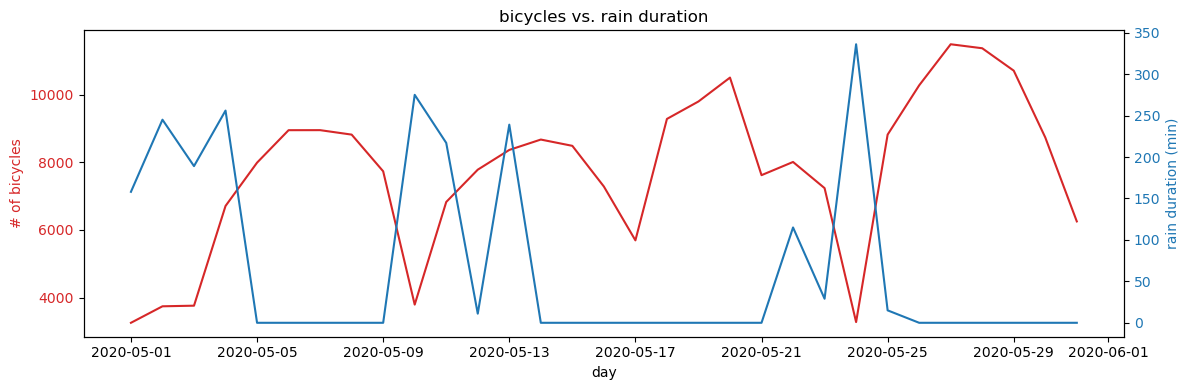

In [39]:
fig, ax1 = plt.subplots(figsize=(12, 4))

color = 'tab:red'
ax1.set_xlabel('day')
ax1.set_ylabel('# of bicycles', color=color)
ax1.plot(t, may_bikes, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('rain duration (min)', color=color)  # we already handled the x-label with ax1
ax2.plot(t, may_rain_duration, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("bicycles vs. rain duration")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

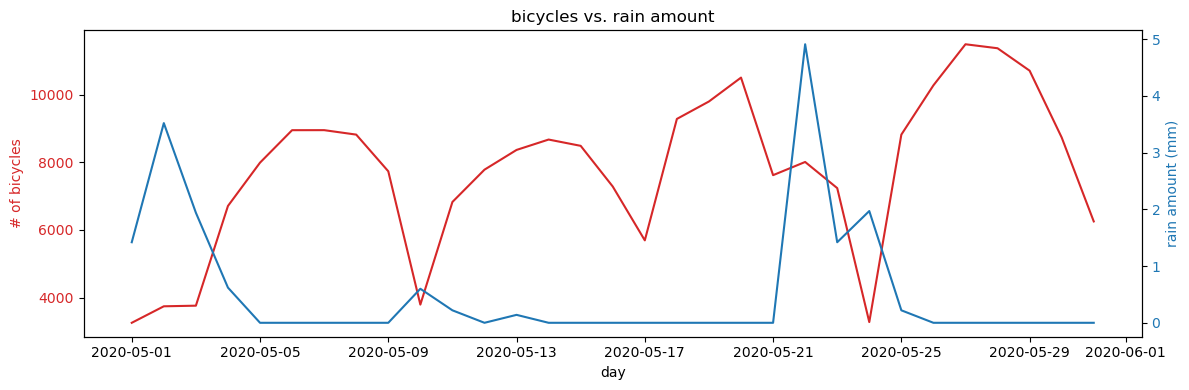

In [33]:
fig, ax1 = plt.subplots(figsize=(12, 4))

color = 'tab:red'
ax1.set_xlabel('day')
ax1.set_ylabel('# of bicycles', color=color)
ax1.plot(t, may_bikes, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('rain amount (mm)', color=color)  # we already handled the x-label with ax1
ax2.plot(t, may_rain_amount, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("bicycles vs. rain amount")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

## Stats

In [40]:
res_duration = stats.pearsonr(may_rain_duration, may_bikes)
res_amount = stats.pearsonr(may_rain_amount, may_bikes)

res_duration, res_amount

(PearsonRResult(statistic=-0.7054060594963953, pvalue=9.345527730174797e-06),
 PearsonRResult(statistic=-0.49189479889113086, pvalue=0.004944929282837113))

## Cleaning

In [41]:
df_rain["RWS_10"].min()

-999.0

In [42]:
idx_erroneous_rows = df_rain[df_rain["RWS_10"] < 0].index

In [43]:
cleaned = df_rain.drop(idx_erroneous_rows, axis=0)

In [47]:
cleaned.index.max() - cleaned.index.min()

Timedelta('1095 days 23:50:00')

In [ ]:
cleaned.groupby(cleaned["MESS_DATUM"].dt.hour)["RWS_10"].sum().plot(kind='bar', rot=0, ax=axs)

In [ ]:
cleaned.head()

## Time frames

In [48]:
time_frame = pd.Series(pd.date_range("2020-01-01", "2022-12-31", freq="M"))

In [53]:
for element in time_frame:
    print(element.year, str(element.month).zfill(2))

2020 01
2020 02
2020 03
2020 04
2020 05
2020 06
2020 07
2020 08
2020 09
2020 10
2020 11
2020 12
2021 01
2021 02
2021 03
2021 04
2021 05
2021 06
2021 07
2021 08
2021 09
2021 10
2021 11
2021 12
2022 01
2022 02
2022 03
2022 04
2022 05
2022 06
2022 07
2022 08
2022 09
2022 10
2022 11
2022 12
